In [2]:
%load_ext autoreload
%autoreload 2
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes
bmes.pipinstall('Bio','biopython')
bmes.pipinstall('GEOparse')
bmes.pipinstall('pandasql')


import GEOparse
import pandas as pd
import numpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Executing command: C:\ProgramData\Anaconda3\python.exe -m pip install -U pandasql
b"Collecting pandasql\r\n  Downloading pandasql-0.7.3.tar.gz (26 kB)\r\nRequirement already satisfied: numpy in c:\\programdata\\anaconda3\\lib\\site-packages (from pandasql) (1.22.2)\r\nRequirement already satisfied: pandas in c:\\programdata\\anaconda3\\lib\\site-packages (from pandasql) (1.3.4)\r\nRequirement already satisfied: sqlalchemy in c:\\programdata\\anaconda3\\lib\\site-packages (from pandasql) (1.4.22)\r\nRequirement already satisfied: python-dateutil>=2.7.3 in c:\\programdata\\anaconda3\\lib\\site-packages (from pandas->pandasql) (2.8.2)\r\nRequirement already satisfied: pytz>=2017.3 in c:\\programdata\\anaconda3\\lib\\site-packages (from pandas->pandasql) (2021.3)\r\nRequirement already satisfied: six>=1.5 in c:\\programdata\\anaconda3\\lib\\site-packages (from python-dateutil>=2.7.3->pandas->pandasql) (

## Download and parse GEO data

In [6]:
# TODO: this will download data everytime this section is executed. Can you optimize?
gse = GEOparse.get_GEO(geo="GSE5847", destdir=bmes.tempdir());

12-Apr-2022 15:10:46 DEBUG utils - Directory C:/Users/ahmet/AppData/Local/Temp/bmes already exists. Skipping.
12-Apr-2022 15:10:46 INFO GEOparse - File already exist: using local version.
12-Apr-2022 15:10:46 INFO GEOparse - Parsing C:/Users/ahmet/AppData/Local/Temp/bmes\GSE5847_family.soft.gz: 
12-Apr-2022 15:10:46 DEBUG GEOparse - DATABASE: GeoMiame
12-Apr-2022 15:10:46 DEBUG GEOparse - SERIES: GSE5847
12-Apr-2022 15:10:46 DEBUG GEOparse - PLATFORM: GPL96
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136326
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136327
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136328
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136329
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136330
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136331
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136332
12-Apr-2022 15:10:46 DEBUG GEOparse - SAMPLE: GSM136333
12-Apr-2022 15:10:47 DEBUG GEOparse - SAMPLE: GSM136334
12-Apr-2022 15:10:47 DEBUG GEOpars

In [59]:
# Each GSM sample is available in gse.gsms[gsmid]
# Information about each sample is available in gse.gsms[...].metadata
gsm= list(gse.gsms.values())[0]
gsm.metadata

{'title': ['LCM stroma sample from patient #37'],
 'geo_accession': ['GSM136326'],
 'status': ['Public on Sep 30 2007'],
 'submission_date': ['Sep 15 2006'],
 'last_update_date': ['Feb 17 2016'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['human breast cancer stroma'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['diagnosis: IBC', 'status: Deceased'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['PicoPure kit (Arcturus)'],
 'label_ch1': ['biotin'],
 'label_protocol_ch1': ['Small Sample Labeling Protocol vII from Affymetrix'],
 'hyb_protocol': ['Standard Affy protocol'],
 'scan_protocol': ['Standard Affy protocol'],
 'description': ['Chemo: Yes, ER: NEG, Her2Neu: NEG, Stage: IIIA, Clinical IBC: No'],
 'data_processing': ['RMA'],
 'platform_id': ['GPL96'],
 'contact_name': ['Stefan,,Ambs'],
 'contact_laboratory': ['LHC'],
 'contact_institute': ['NCI'],
 'contact_address': ['37 Convent Dr Bldg 37 Room 3050'],
 'conta

In [68]:
# Data for each GSM is available in gse.gsms[...].table

# Combine GSM's into a single data table.
gsedata = None
for gsmid in gse.gsms.keys():
    gsmdata = gse.gsms[gsmid].table.rename(columns={'VALUE':gsmid});
    if gsedata is None: gsedata=gsmdata;
    else:
        assert(gsedata['ID_REF'].equals(gsmdata['ID_REF'])) #just make sure that the same probes are listed in the same order.
        gsedata = pd.concat([gsedata,gsmdata[gsmid]],axis=1);

gsedata = gsedata.set_index('ID_REF')
gsedata.head()

,GSM136326,GSM136327,GSM136328,GSM136329,GSM136330,GSM136331,GSM136332,GSM136333,GSM136334,GSM136335,...,GSM136411,GSM136412,GSM136413,GSM136414,GSM136415,GSM136416,GSM136417,GSM136418,GSM136419,GSM136420
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,10.450276,9.399542,9.424799,9.472922,9.278780,9.434428,9.924859,9.561787,9.745115,9.508479,...,10.679646,9.804469,10.562347,10.792802,10.250198,10.762713,10.560312,10.757617,10.888868,10.772049
1053_at,5.719466,4.849293,4.732081,4.728854,5.326392,5.230320,5.215126,4.834023,4.877629,5.033619,...,5.684671,5.726441,5.731007,5.646109,5.690716,5.873947,5.630389,5.527384,6.216526,6.076195
117_at,5.938664,6.083273,6.447978,6.176949,6.544585,6.077795,6.293336,6.206549,5.916959,6.633561,...,6.418576,6.725075,6.420450,6.504424,6.602684,6.698563,6.424410,6.426399,6.494861,6.258779
121_at,8.023052,7.894659,8.344988,8.163204,8.233756,7.595106,7.916302,7.927066,8.032575,7.908482,...,8.253583,8.475521,8.177014,8.327302,8.275579,8.378434,8.430819,8.403584,8.691069,8.250358
1255_g_at,3.954803,3.963246,3.964102,4.087836,3.998893,3.839705,4.058756,3.958660,4.118736,4.025031,...,4.143628,4.231317,4.117592,4.229090,4.182036,4.102979,4.178124,4.353376,4.290219,4.107710


In [54]:
gplid = list(gse.gpls.values())[0]
print(gplid)

<d: GPL96>


In [69]:
gpl = list(gse.gpls.values())[0].table;
#gpl.head()
gpl[["ID", "Gene Symbol", "Gene Ontology Biological Process", "Gene Ontology Cellular Component", "Gene Ontology Molecular Function"]].head()

,ID,Gene Symbol,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,DDR1 /// MIR4640,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,RFC2,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,HSPA6,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,PAX8,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,GUCA1A,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


## Show a Clustergram of Expression Values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


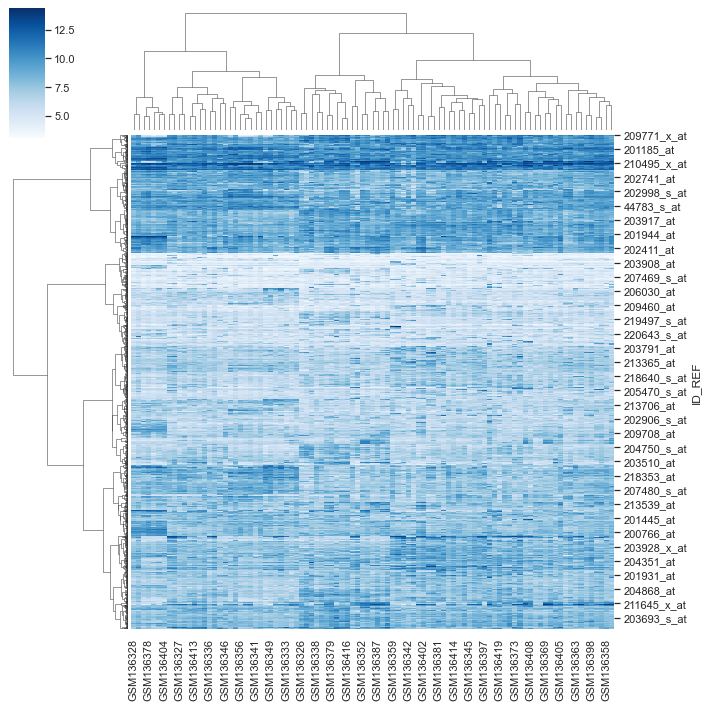

In [90]:
vars = gsedata.var(axis=1) #variances

import numpy
import math
sortedvars = numpy.sort( vars.values )
minvar = sortedvars[ math.floor(sortedvars.size*0.9) ]
d2 = gsedata.drop( gsedata[vars<minvar].index, axis=0)

import seaborn
seaborn.set(style='darkgrid')
clust = seaborn.clustermap(d2, metric="euclidean", method="ward", cmap="Blues")